## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#Read a dataset file
df = pd.read_csv('ab_data.csv')

#Display the first top rows of the dataset
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
#Find the number of rows in the dataset.
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
#Find the number of unique user_id in the dataset.
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
#Find the propotion of users converted (using dataframe query)
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#Find the total number of times the new_page and treatment don't line up 
df[((df['landing_page'] != "new_page") & (df['group'] == "treatment"))
    |
   ((df['landing_page'] == "new_page") & (df['group'] != "treatment"))].shape[0]

3893

f. Do any of the rows have missing values?

In [7]:
#Count null values in the dataset 
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#Removing the rows where 'treatment' is not aligned with 'new_page'  
# or 'control' is not aligned with 'old_page' as the answer to the quiz 2.
df2 = df[((df['group'] == 'treatment') & (df['landing_page'] == 'new_page'))
         |
         ((df['group'] == 'control') & (df['landing_page'] == 'old_page'))]

#Display the first top rows of the new dataset
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
#Find the number of unique user_id in the dataset.
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
#Find the repeated row in 'user_id' column
df2[['user_id']][df2['user_id'].duplicated() == True]

,user_id
2893,773192


c. What is the row information for the repeat **user_id**? 

In [12]:
#Display information about duplicate row (user_id)
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
#Remove duplicated row (index no = 2893)
df2 = df2.drop([2893])

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
#Find the probability of an individual converting regardless of the page they receive
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
#Find the probability of converted individuals was in the 'control' group.
df2[df2['group'] == 'control']['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
#Find the probability of converted individuals was in the 'treatment' group.
df2[df2['group'] == 'treatment']['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
#Find the probability of individual received the new page 
#df2[df2['landing_page'] == 'new_page'].mean()
#df2[(df2['landing_page'] == "new_page")].mean()
df2.query('landing_page == "new_page"').count()[0] / df2.shape[0]

0.5000619442226688

In [18]:
#Change timestamp datatype to datetime
df2['timestamp'] = pd.to_datetime(df['timestamp'])
#calculate the time interval that our data lies between it. (Duration of experiment)
df2.timestamp.max() - df2.timestamp.min()

Timedelta('21 days 23:59:49.081927')

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**From the above results We can find below the information:**

* Probability of converting regardless of the page is 0.1196
* Given an individual received the control page, the probability of converting is 0.1204
* Given that an individual received the treatment, the probability of converting is 0.1188
* probability of individual receiving a new page is  0.50006
* The duration of the experiment of the dataset is 22 days.

**Based on the above result,** we can see that the probability users converted in both control and treatment groups are almost close or similar to each other and the probability of an individual converting regardless of the page they receive. Also, the probability of the new page is roughly half which doesn't prove that all new treatment pages will be more converted. In the end, the short duration makes us do not judge the new_page now and misleading decision on it.  Therefore, there is no evidence that new page leads to more conversions

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


<div style="text-align: center;"><b>
<br>Null Hypotheses:  $p_{new}$ is equal less or equal to  $p_{old}$<br/>
<br>Alternative Hypothesis:  $p_{old}$ is greater than $p_{new}$<br/>
<br>$H_{0}$: $p_{new}$ <= $p_{old}$<br/>
<br>$H_{1}$: $p_{new}$ > $p_{old}$<br/>
<b/></div>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
#Find proportion of the converted rate for new page
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
#Find proportion of the converted rate for old page
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [21]:
#Find the landing page which is new page.
new_page = df2[df2['landing_page'] == "new_page"].shape[0]
new_page

145310

d. What is $n_{old}$?

In [22]:
#Find the landing page which is old page.
old_page = df2[df2['landing_page'] == "old_page"].shape[0]
old_page

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
# Simulate the converted column (data) of new page using random binomial with probability equals p_new
new_page_converted = np.random.binomial(new_page,p_new)
new_page_converted

17591

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
# Simulate the converted column (data) of old page using random binomial with probability equals p_old
old_page_converted = np.random.binomial(old_page,p_old)
old_page_converted

17469

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
(new_page_converted/new_page) - (old_page_converted/old_page)

0.0008097931951676213

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(new_page,p_new)
    old_page_converted = np.random.binomial(old_page, p_old)
    p_diff = new_page_converted/new_page - old_page_converted/old_page
    p_diffs.append(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([2.000e+00, 1.700e+01, 2.120e+02, 9.640e+02, 2.316e+03, 3.130e+03,
        2.295e+03, 8.740e+02, 1.710e+02, 1.900e+01]),
 array([-0.00539821, -0.00441879, -0.00343937, -0.00245995, -0.00148053,
        -0.00050111,  0.00047831,  0.00145773,  0.00243715,  0.00341657,
         0.004396  ]),
 <a list of 10 Patch objects>)

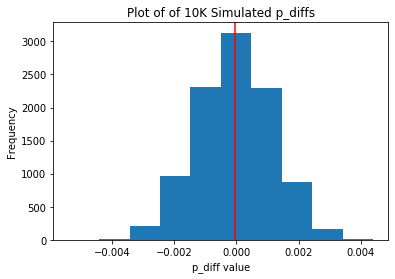

In [27]:
plt.xlabel('p_diff value')
plt.ylabel('Frequency')
plt.title('Plot of of 10K Simulated p_diffs');
plt.axvline(x= np.array(p_diffs).mean(), color='r');
plt.hist(p_diffs)

We expected it to be a normal distribution because the smoothing of the mean differences always gives the result of the normal distribution based on the central limit theory.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
p_diff_orig = df[df['landing_page'] == 'new_page']['converted'].mean() - df[df['landing_page'] == 'old_page']['converted'].mean()
p_diff_orig

-0.0016367945992569882

In [29]:
p_diffs = np.array(p_diffs)
p_diff_proportion = (p_diff_orig < p_diffs).mean()
p_diff_proportion

0.9055

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We calculate the p-value. If the null hypothesis ($ H_ {0} $) is true, the p-value gives the probability of the statistics tested. In this case, the new page has no better conversion rates than the old page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

convert_old = sum(df2.query("landing_page == 'old_page'")['converted'])
convert_new = sum(df2.query("landing_page == 'new_page'")['converted'])
n_old = len(df2.query("landing_page == 'old_page'"))
n_new = len(df2.query("landing_page == 'new_page'"))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
# Calculating z-score and p-value
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [32]:
from scipy.stats import norm
#significant of z-score
print(norm.cdf(z_score))

#For our single-sides test, assumed at 95% confidence level, we calculate: 
print(norm.ppf(1-(0.05)))

0.9050583127590245
1.6448536269514722



Z-score is a measure of how many standard deviations below or above the population mean a raw score is. We find that the z-score of 1.3109241 is less than the critical value of 1.644854 which means we can't reject the null hypothesis. We find that old page conversion is slightly better than new page conversions. Even though the values are different from findings in parts j. and k but it suggests there is no significant difference between the old page and new page conversions.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression**  because the target variable is categorical (whether it is converted or not)

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
df2['intercept'] = 1
df2[['control', 'ab_page']]=pd.get_dummies(df2['group'])
df2.drop(labels=['control'], axis=1, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [34]:
import statsmodels.api as sm
import scipy.stats as stats
logit = sm.Logit(df2['converted'],df2[['intercept' ,'ab_page']])
results = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
#Displaying the results 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 14 Oct 2019   Pseudo R-squ.:               8.077e-06
Time:                        22:56:47   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

*The p-value associated with ab_page is 0.190. The reason it differs from the value I found in Part II is because in Part II, it is the fact that they are analyzing separate things. In part II, the null hypothesis was that the old page was more effective or equally as effective at converting users than the new page. In part III, the null hypothesis is that the old page has the same effectiveness as the new page. The alternate hypothesis is that the new page is not equal in effectiveness as the old page. The p-value from part III shows is more than 0.05, which means we reject the null hypothesis that both pages have equal effectiveness at converting users.*

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

*There might be many factors that can affect individual converts like age group and gender can play a significant change. Also, usage and access may affect the rate of conversion. We can find new trends using other factors but there may be some disadvantages like even with new factors we may miss some other influencing factors which lead to unreliable and contradictory results compared to previous results.*

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [39]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [40]:
### Create the necessary dummy variables
df_new[['CA','UK','US']]=pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [42]:
mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK']])
results = mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 15 Oct 2019   Pseudo R-squ.:               1.521e-05
Time:                        00:11:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [43]:
### Fit Your Linear Model And Obtain the Results
mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK','ab_page']])
results = mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 15 Oct 2019   Pseudo R-squ.:               2.323e-05
Time:                        00:13:00   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

*The p-values for all countries are above 0.05 which signifies that they are statistically insignificant in predicting the conversion of users.*

<a id='conclusions'></a>
## Conclusions

*This project aims to help the company understand whether it should implement this new page, keep the old page, or run the experiment longer to make its decision.*

* **In Part I,** If the statistical results are not interpreted accurately it will mislead us and lead us to wrong analysis and decisions for example (Simpson's Paradox).

* **In Part II,** we assumed the old page was more effective or equally as effective at converting users than the new page (null hypothesis). This study concluded that with a p-value of 0.906, we cannot reject the empty hypothesis. Also, we calculated the value z-value which also failed to reject the null hypothesis.

* **In Part III,** we used the logistic regression model to calculate the p-value. The results also could not reject the null hypothesis.

*In addation, we included another factor in the regression model, which is the user's country. This was to avoid Simpson's Paradox and to ensure consistency between test subjects in the control and experimental group. There was no indication that the user's country of residence significantly affected the conversion rate.*

*Therefore, we can also conclude that there is no practical reason to approve the new page because there is no evidence that the new page raises conversion rates for users and therefore is not worth the cost nor the time of launching the new page.*




 

